In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
def rk4(state, f, h):
    t, x = state[:1], state[1:]
    
    k1 = h*f(t, x)
    k2 = h*f(t + 0.5*h, x + 0.5*k1)
    k3 = h*f(t + 0.5*h, x + 0.5*k2)
    k4 = h*f(t + h, x + k3)

    t_new = t + h
    x_new = x + (k1 + 2*k2 + 2*k3 + k4)/6

    new_state = np.concatenate((t_new, x_new))
    
    return new_state

def euler(state, f, h):
    t, x = state[:1], state[1:]
    
    t_new = t + h
    x_new = x + h * f(t, x)
    
    new_state = np.concatenate((t_new, x_new))
    
    return new_state

In [3]:
def foo(t, x):
    return -x + np.exp(-t)

def lotka_volterra(t, x):
    x_prim = x[0] * (3 - 0.5 * x[1])
    y_prim = x[1] * (-2  + 0.5 * x[0])
    
    return np.array([x_prim, y_prim, 0])


In [13]:
v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
K_c = 0.5
V_M1 = 3
K_1 = 0.005
V_2 = 1.5
K_2 = 0.005
V_M3 = 1
K_3 = 0.005
V_4 = 0.5
K_4 = 0.005

def mitotic_oscilator(t, x):
    C = x[0]
    M = x[1]
    X = x[2]
    
    C_prim = v_i - v_d * X * C / (K_d + C) - k_d * C
    
    V_1 = C / (K_c + C) * V_M1
    M_prim = V_1 * (1 - M) / (K_1 + 1 - M) - V_2 * M / (K_2 + M)
    
    V_3 = M * V_M3
    X_prim = V_3 * (1 - X) / (K_3 + 1 - X) - V_4 * X / (K_4 + X)
    
    return np.array([C_prim, M_prim, X_prim])


In [23]:
class Simulation():
    def __init__(self, initial_state, h = 0.01, method = rk4, logging_frequency = 100):
        self.history = pd.DataFrame(data = np.expand_dims(initial_state, axis = 0),
                                    columns = ['t', 'C', 'M', 'X'],
                                    index = [0])
        self.state = initial_state
        
        self.h = h
        self.method = method
        self.logging_frequency = logging_frequency
        self.log_counter = 0
        
    def step(self):
        self.state = self.method(self.state, mitotic_oscilator, self.h)
        
        self.log_counter += 1
        
        if self.log_counter == self.logging_frequency:
            self.add_current_state_to_history()
            self.log_counter = 0
            
        
    def add_current_state_to_history(self):
        self.history = self.history.append(dict(zip(self.history.columns, self.state)), ignore_index = True)
        
    def get_history(self, variable, last_n = None):
        if last_n is not None:
            return self.history[variable][-last_n:]
        else:
            return self.history[variable]
                                               

In [24]:
sim = Simulation(initial_state = np.array([0, 0.01 , 0.01, 0.01]), h = 0.01, logging_frequency = 100, method = rk4)
# sim_coarse = Simulation(initial_state = np.array([0,5,2,3]), h = 0.01, logging_frequency = 20)

for i in range(20000):
    sim.step()
#     sim_coarse.step()

In [28]:
sim.get_history('t', 100)

101    101.0
102    102.0
103    103.0
104    104.0
105    105.0
       ...  
196    196.0
197    197.0
198    198.0
199    199.0
200    200.0
Name: t, Length: 100, dtype: float64

<IPython.core.display.Javascript object>


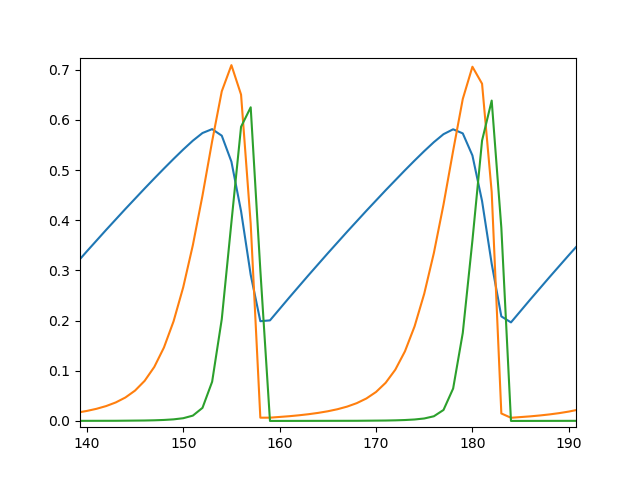

In [22]:
plt.plot(sim.history['t'], sim.history['C'])
plt.plot(sim.history['t'], sim.history['M'])
plt.plot(sim.history['t'], sim.history['X'])
plt.show()